<a href="https://colab.research.google.com/github/CarlTeapot/Walmart-Recruiting/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install mlflow==2.2.2
!pip install dagshub

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt

od.download("https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matearevadze
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 207MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [55]:

train_data = "train.csv"
feature_data="features.csv"

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


train_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/train.csv.zip")

feature_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/features.csv.zip")
store_df=pd.read_csv("/content/walmart-recruiting-store-sales-forecasting/stores.csv")



train_df=pd.merge(train_df, store_df, on='Store')
train_df=pd.merge(train_df, feature_df, on=['Store','Date'])


In [56]:
train_df = train_df.drop(columns=['IsHoliday_y'])

train_df = train_df.rename(columns={'IsHoliday_x': 'IsHoliday'})
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)


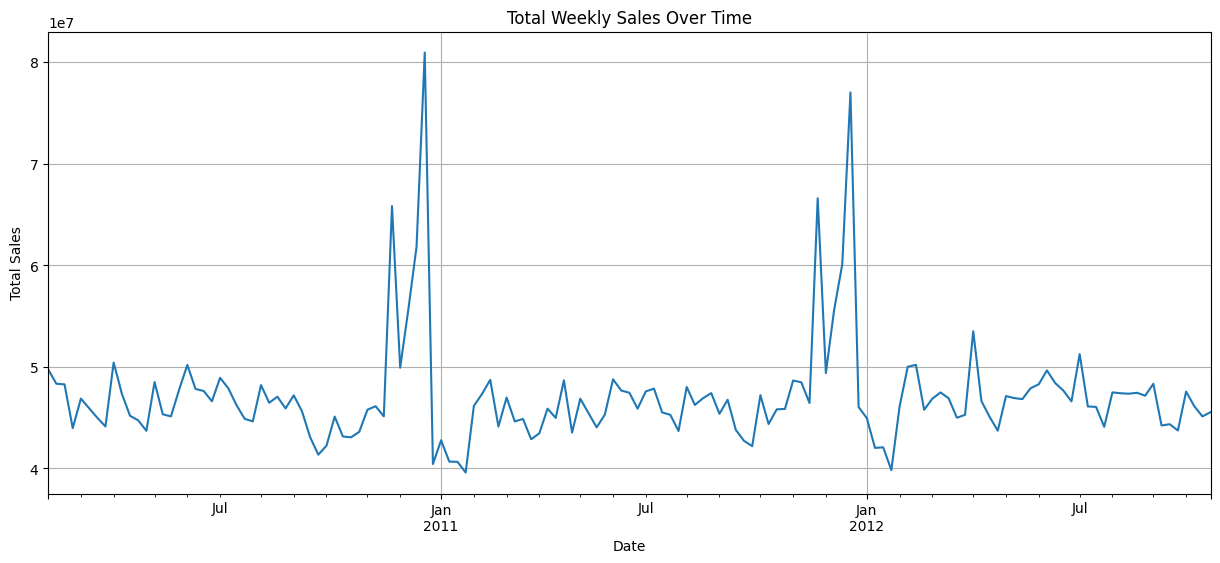

In [57]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

plt.figure(figsize=(15, 6))
train_df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

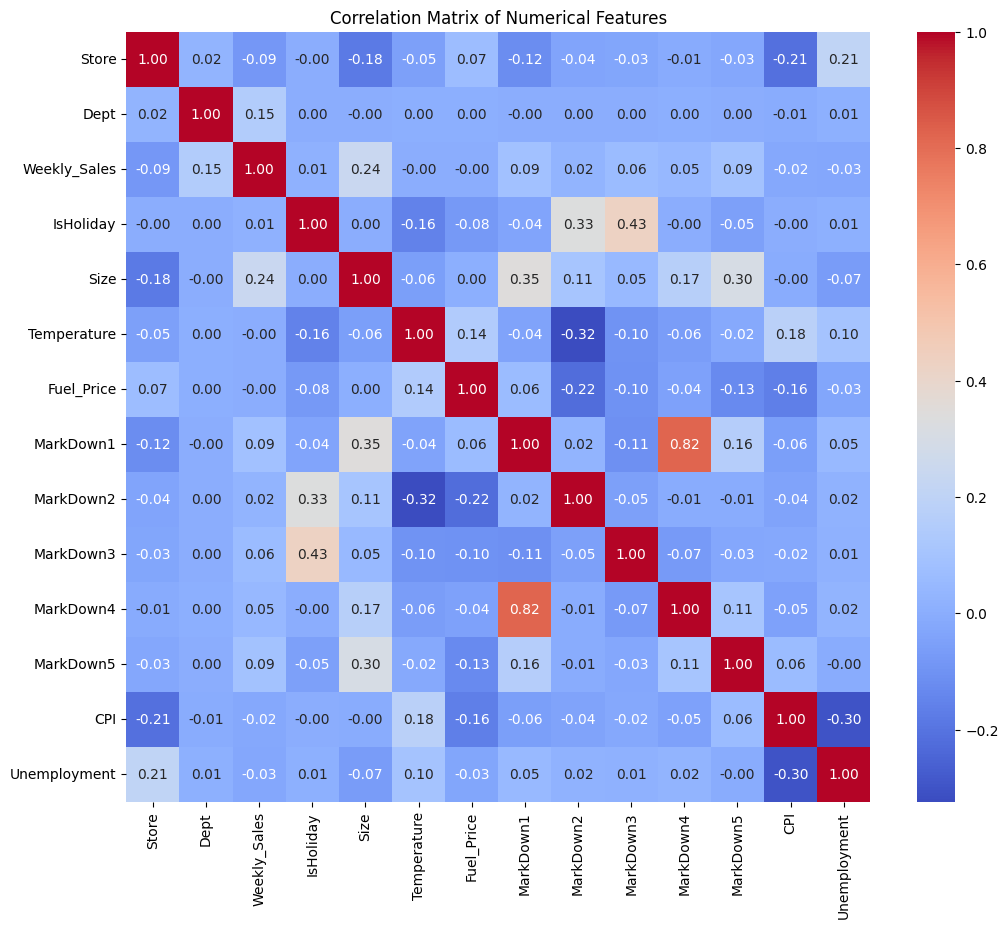

In [58]:

# Select only numeric columns for the correlation matrix
numeric_df = train_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [72]:
# Count rows with negative or zero sales
negative_sales_count = train_df[train_df['Weekly_Sales'] <= 0].shape[0]
total_rows = train_df.shape[0]
percentage_negative_sales = (negative_sales_count / total_rows) * 100
print(f"Number of rows with negative or zero sales: {negative_sales_count}")
print(f"Percentage of rows with negative or zero sales: {percentage_negative_sales:.2f}%")

Number of rows with negative or zero sales: 1358
Percentage of rows with negative or zero sales: 0.32%


In [75]:
negative_sales_df = train_df[train_df['Weekly_Sales'] < 0].copy()
display(negative_sales_df)

# Calculate the percentage of IsHoliday being true for negative sales
holiday_negative_sales = negative_sales_df['IsHoliday'].sum()
total_negative_sales = len(negative_sales_df)
percentage_holiday_negative = (holiday_negative_sales / total_negative_sales) * 100
print(f"Percentage of negative sales on a holiday: {percentage_holiday_negative:.2f}%")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
846,1,6,2012-08-10,-139.65,0,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908
2384,1,18,2012-05-04,-1.27,0,A,151315,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143
6048,1,47,2010-02-19,-863.00,0,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
6049,1,47,2010-03-12,-698.00,0,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6051,1,47,2010-10-08,-58.00,0,A,151315,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,1,B,118221,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992
419598,45,80,2010-02-19,-0.27,0,B,118221,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992
419603,45,80,2010-04-16,-1.61,0,B,118221,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899
419614,45,80,2010-07-02,-0.27,0,B,118221,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743


Percentage of negative sales on a holiday: 7.63%


In [67]:
store_dept_sales = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].mean().reset_index()

sorted_sales = store_dept_sales.sort_values(by='Weekly_Sales', ascending=True)

display(sorted_sales.head(10))

,Store,Dept,Weekly_Sales
43,1,47,-116.454545
2623,35,47,-99.088333
3299,45,47,-88.420000
2546,34,47,-78.919167
722,10,47,-64.694444
3115,42,71,-58.445000
1186,16,47,-57.726667
1726,23,47,-45.958333
876,12,47,-43.899091
3116,42,72,-43.211786


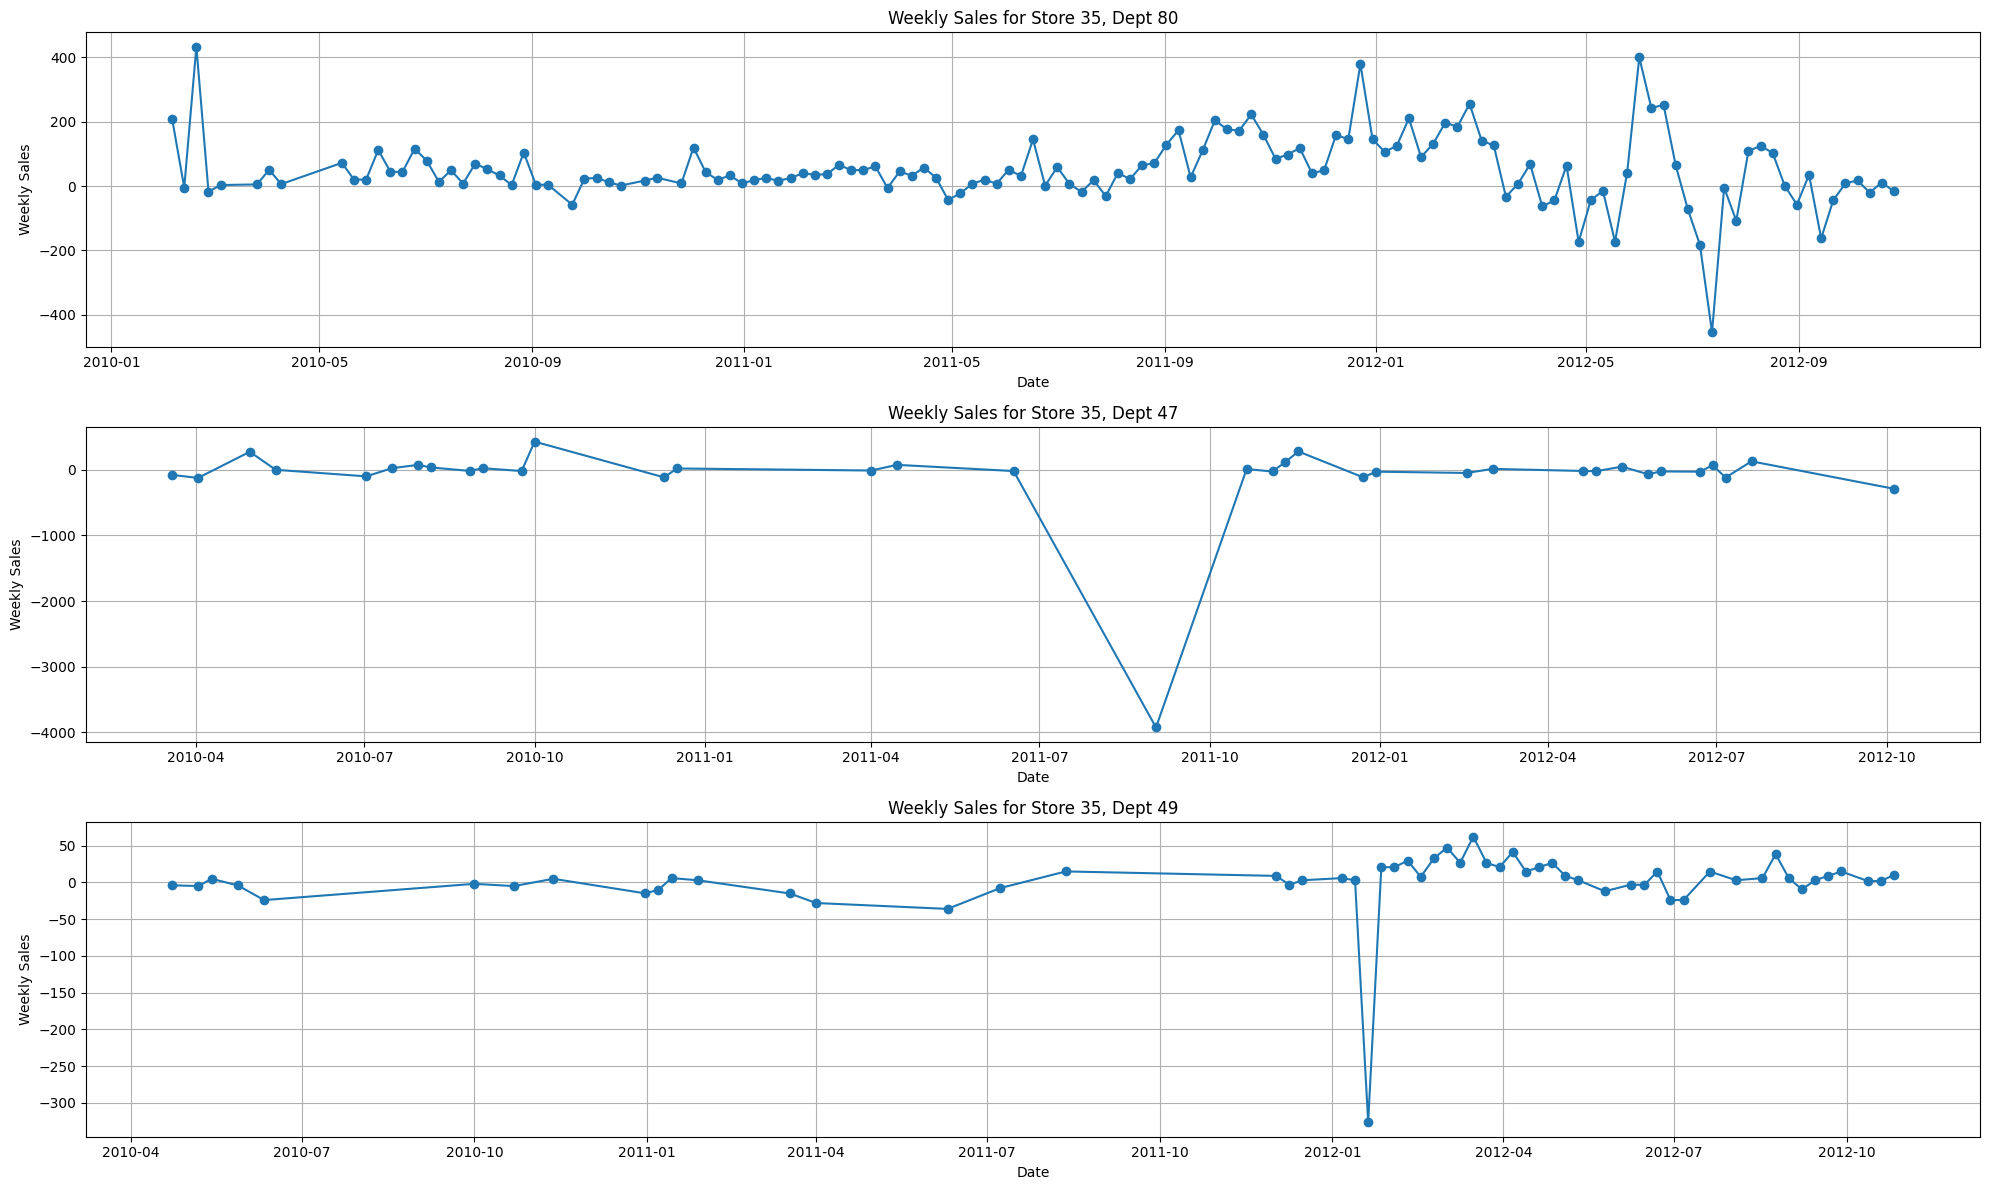

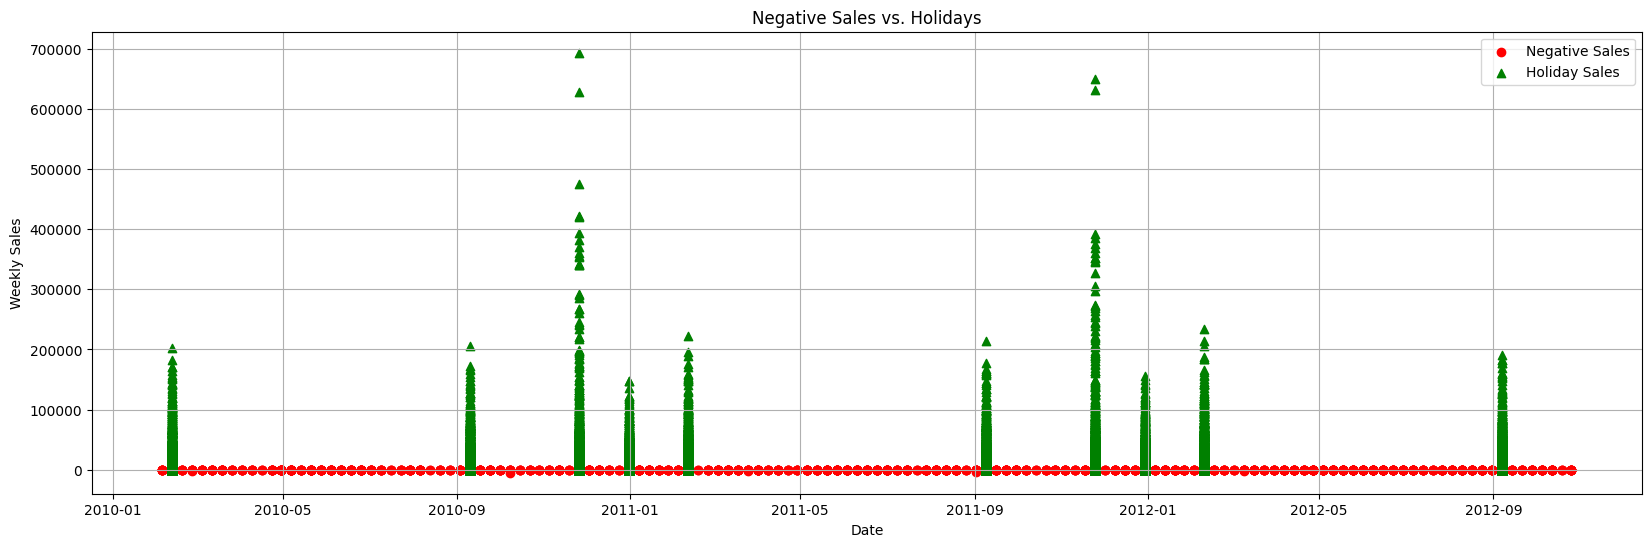


**Summary of Findings:**

*   **Refund Pattern**: The plots of weekly sales for store-department pairs with the most negative sales show that negative sales often occur in close proximity to larger positive sales. This suggests that the negative values are likely due to customer returns or refunds.
*   **Holiday Pattern**: The timeline plot of negative sales and holidays does not show a strong correlation. Negative sales appear to be distributed throughout the year, not just after major holidays.

**Conclusion:** The analysis suggests that the negative sales values are more likely to be refunds rather than being directly related to holiday sales events.



In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Isolate Negative Sales Data
negative_sales_df = train_df[train_df['Weekly_Sales'] < 0].copy()

# 2. Analyze Refund Pattern
# Get the top 3 store-department pairs with the most negative sales
top_negative_pairs = negative_sales_df.groupby(['Store', 'Dept']).size().nlargest(3).index

plt.figure(figsize=(20, 12))
for i, (store, dept) in enumerate(top_negative_pairs, 1):
    plt.subplot(3, 1, i)
    store_dept_df = train_df[(train_df['Store'] == store) & (train_df['Dept'] == dept)]
    plt.plot(store_dept_df['Date'], store_dept_df['Weekly_Sales'], marker='o', linestyle='-')
    plt.title(f'Weekly Sales for Store {store}, Dept {dept}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Analyze Holiday Pattern
plt.figure(figsize=(20, 6))
plt.scatter(negative_sales_df['Date'], negative_sales_df['Weekly_Sales'], color='red', label='Negative Sales')
holidays = train_df[train_df['IsHoliday'] == 1]
plt.scatter(holidays['Date'], holidays['Weekly_Sales'], color='green', marker='^', label='Holiday Sales')
plt.title('Negative Sales vs. Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

# 4. Summarize Findings
print("""
**Summary of Findings:**

*   **Refund Pattern**: The plots of weekly sales for store-department pairs with the most negative sales show that negative sales often occur in close proximity to larger positive sales. This suggests that the negative values are likely due to customer returns or refunds.
*   **Holiday Pattern**: The timeline plot of negative sales and holidays does not show a strong correlation. Negative sales appear to be distributed throughout the year, not just after major holidays.

**Conclusion:** The analysis suggests that the negative sales values are more likely to be refunds rather than being directly related to holiday sales events.
""")

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)